# Lab06: Nonparametric Methods
## Mehmet Gönen
### April 1, 2022

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Parameters

In [2]:
np.random.seed(421)
# mean parameters
class_means = np.array([-2.0, +1.0, +3.0])
# standard deviation parameters
class_deviations = np.array([2.0, 1.2, 1.6])
# sample sizes
class_sizes = np.array([20, 15, 25])

## Data Generation

In [3]:
# generate random samples
points1 = np.random.normal(class_means[0], class_deviations[0], class_sizes[0])
points2 = np.random.normal(class_means[1], class_deviations[1], class_sizes[1])
points3 = np.random.normal(class_means[2], class_deviations[2], class_sizes[2])
points = np.concatenate((points1, points2, points3))

# generate corresponding labels
y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))

## Exporting Data

In [4]:
# write data to a file
np.savetxt("lab06_data_set.csv", np.stack((points, y), axis = 1), fmt = "%f,%d")

## Plotting Data

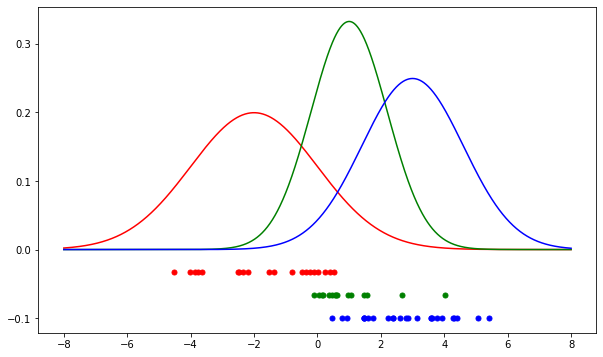

In [5]:
data_interval = np.linspace(-8.0, +8.0, 1601)
density1 = stats.norm.pdf(data_interval, loc = class_means[0], scale = class_deviations[0])
density2 = stats.norm.pdf(data_interval, loc = class_means[1], scale = class_deviations[1])
density3 = stats.norm.pdf(data_interval, loc = class_means[2], scale = class_deviations[2])

plt.figure(figsize = (10, 6))
# plot data points of the first class
plt.plot(points1, np.repeat(-0.1 * np.max((density1, density2, density3)), class_sizes[0]), "r.", markersize = 10)
# plot density of the first class
plt.plot(data_interval, density1, "r")
# plot data points of the second class
plt.plot(points2, np.repeat(-0.2 * np.max((density1, density2, density3)), class_sizes[1]), "g.", markersize = 10)
# plot density of the second class
plt.plot(data_interval, density2, "g")
# plot data points of the third class
plt.plot(points3, np.repeat(-0.3 * np.max((density1, density2, density3)), class_sizes[2]), "b.", markersize = 10)
# plot density of the third class
plt.plot(data_interval, density3, "b")
plt.show()

## Importing Data

In [6]:
# read data into memory
data_set = np.genfromtxt("lab06_data_set.csv", delimiter = ",")

# get x and y values
x_train = data_set[:,0]
y_train = data_set[:,1].astype(int)

# get number of classes and number of samples
K = np.max(y_train)
N = data_set.shape[0]

## Drawing Parameters

In [7]:
point_colors = np.array(["red", "green", "blue"])
minimum_value = -8.0
maximum_value = +8.0
data_interval = np.linspace(minimum_value, maximum_value, 1601)

## Histogram Estimator

$$\hat{p}(x) = \dfrac{\#\{x_{i} \textrm{ is in the same bin as } x\}}{Nh}$$

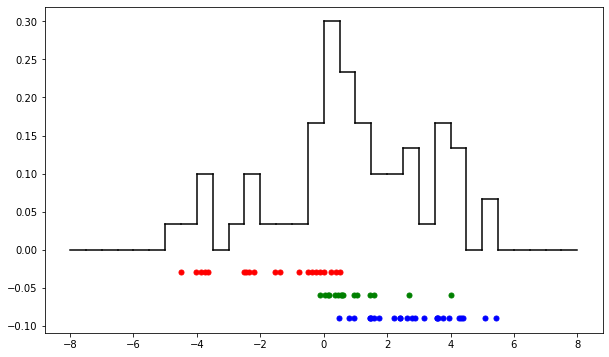

In [8]:
bin_width = 0.5
left_borders = np.arange(minimum_value, maximum_value, bin_width)
right_borders = np.arange(minimum_value + bin_width, maximum_value + bin_width, bin_width)
p_hat = np.asarray([np.sum((left_borders[b] < x_train) & (x_train <= right_borders[b])) for b in range(len(left_borders))]) / (N * bin_width)

plt.figure(figsize = (10, 6))
plt.plot(x_train[y_train == 1], np.repeat(-0.1 * np.max(p_hat), np.sum(y_train == 1)), "r.", markersize = 10)
plt.plot(x_train[y_train == 2], np.repeat(-0.2 * np.max(p_hat), np.sum(y_train == 2)), "g.", markersize = 10)
plt.plot(x_train[y_train == 3], np.repeat(-0.3 * np.max(p_hat), np.sum(y_train == 3)), "b.", markersize = 10)
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_hat[b], p_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat[b], p_hat[b + 1]], "k-")    
plt.show()

## Naive Estimator

$$\hat{p}(x) = \dfrac{\#\{x - h/2 \lt x_{i} \leq x + h/2\}}{Nh}$$

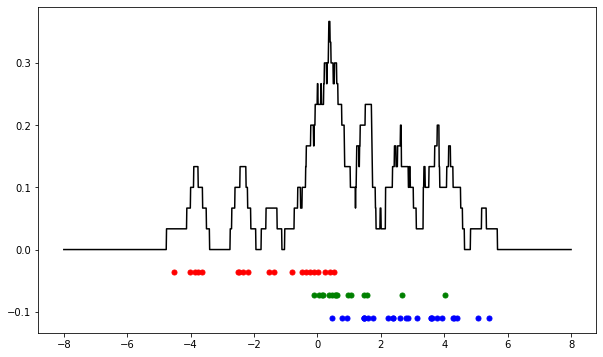

In [9]:
bin_width = 0.5
p_hat = np.asarray([np.sum(((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width))) for x in data_interval]) / (N * bin_width)

plt.figure(figsize = (10, 6))
plt.plot(x_train[y_train == 1], np.repeat(-0.1 * np.max(p_hat), np.sum(y_train == 1)), "r.", markersize = 10)
plt.plot(x_train[y_train == 2], np.repeat(-0.2 * np.max(p_hat), np.sum(y_train == 2)), "g.", markersize = 10)
plt.plot(x_train[y_train == 3], np.repeat(-0.3 * np.max(p_hat), np.sum(y_train == 3)), "b.", markersize = 10)
plt.plot(data_interval, p_hat, "k-")
plt.show()

## Kernel Estimator

\begin{align*}
\hat{p}(x) &= \dfrac{1}{Nh} \sum \limits_{i = 1}^{N} K\left(\dfrac{x - x_{i}}{h}\right) \\
K(u) &= \dfrac{1}{\sqrt{2\pi}} \exp\left(-\dfrac{u^2}{2}\right)
\end{align*}

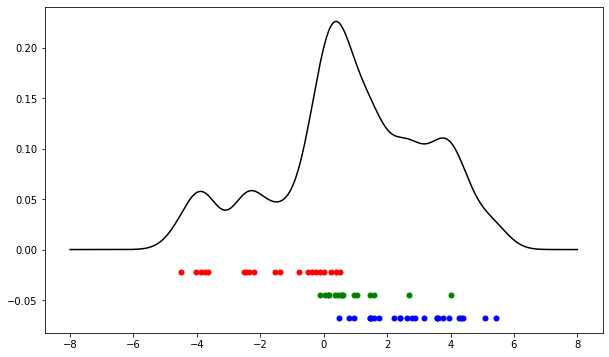

In [10]:
bin_width = 0.5
p_hat = np.asarray([np.sum(1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2)) for x in data_interval]) / (N * bin_width)

plt.figure(figsize = (10, 6))
plt.plot(x_train[y_train == 1], np.repeat(-0.1 * np.max(p_hat), np.sum(y_train == 1)), "r.", markersize = 10)
plt.plot(x_train[y_train == 2], np.repeat(-0.2 * np.max(p_hat), np.sum(y_train == 2)), "g.", markersize = 10)
plt.plot(x_train[y_train == 3], np.repeat(-0.3 * np.max(p_hat), np.sum(y_train == 3)), "b.", markersize = 10)
plt.plot(data_interval, p_hat, "k-")
plt.show()

## $k$-Nearest Neighbor Estimator

\begin{align*}
\hat{p}(x) &= \dfrac{k}{2Nd_{k}(x)} \\
d_{k}(x) &= \textrm{distance to $k^{th}$ closest data point to $x$} 
\end{align*}

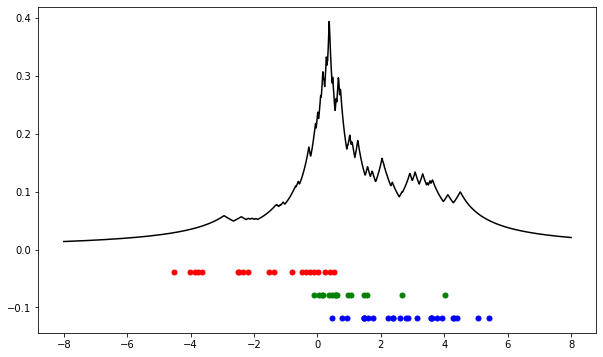

In [11]:
k = 11
p_hat = np.asarray([k / (2 * N * np.sort(np.abs(x - x_train))[k - 1]) for x in data_interval])

plt.figure(figsize = (10, 6))
plt.plot(x_train[y_train == 1], np.repeat(-0.1 * np.max(p_hat), np.sum(y_train == 1)), "r.", markersize = 10)
plt.plot(x_train[y_train == 2], np.repeat(-0.2 * np.max(p_hat), np.sum(y_train == 2)), "g.", markersize = 10)
plt.plot(x_train[y_train == 3], np.repeat(-0.3 * np.max(p_hat), np.sum(y_train == 3)), "b.", markersize = 10)
plt.plot(data_interval, p_hat, "k-")
plt.show()

## Nonparametric Classification

$$g_{c}(x) = \dfrac{1}{Nh} \sum \limits_{i = 1}^{N} \left[K\left(\dfrac{x - x_{i}}{h}\right)y_{ic}\right]$$

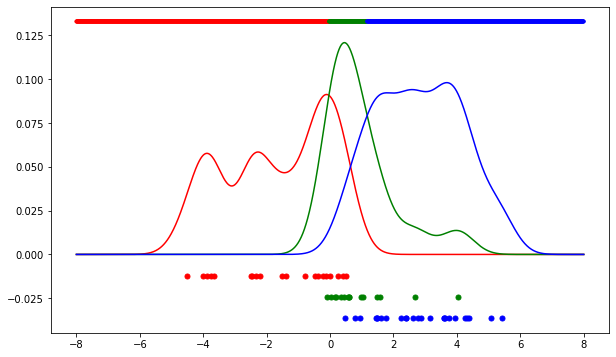

In [12]:
bin_width = 0.5
score = np.zeros((len(data_interval), K))
for c in range(K):
    score[:,c] = np.asarray([np.sum(1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train[y_train == (c + 1)])**2 / bin_width**2)) for x in data_interval]) / (N * bin_width)

plt.figure(figsize = (10, 6))
plt.plot(x_train[y_train == 1], np.repeat(-0.1 * np.max(score), np.sum(y_train == 1)), "r.", markersize = 10)
plt.plot(x_train[y_train == 2], np.repeat(-0.2 * np.max(score), np.sum(y_train == 2)), "g.", markersize = 10)
plt.plot(x_train[y_train == 3], np.repeat(-0.3 * np.max(score), np.sum(y_train == 3)), "b.", markersize = 10)
for c in range(K):
    plt.plot(data_interval, score[:,c], color = point_colors[c])
plt.scatter(data_interval, np.repeat(np.max(score) * 1.1, len(data_interval)), c = point_colors[np.argmax(score, axis = 1)], marker = ".")    
plt.show()

## $k$-NN Classification

$$g_{c}(x) = \dfrac{k_{c}}{k}$$

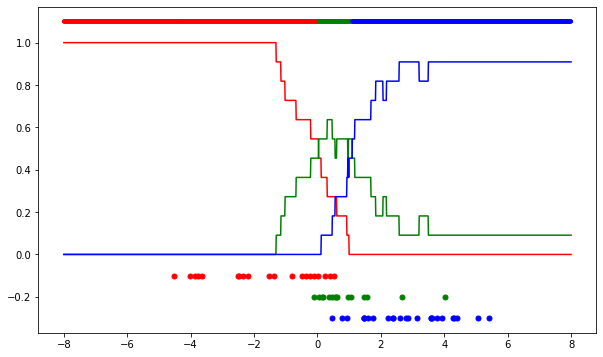

In [13]:
k = 11
score = np.zeros((len(data_interval), K))
for c in range(K):
    score[:,c] = np.asarray([np.sum(y_train[np.argsort(np.abs(x - x_train))[range(k)]] == c + 1) for x in data_interval]) / k

plt.figure(figsize = (10, 6))
plt.plot(x_train[y_train == 1], np.repeat(-0.1 * np.max(score), np.sum(y_train == 1)), "r.", markersize = 10)
plt.plot(x_train[y_train == 2], np.repeat(-0.2 * np.max(score), np.sum(y_train == 2)), "g.", markersize = 10)
plt.plot(x_train[y_train == 3], np.repeat(-0.3 * np.max(score), np.sum(y_train == 3)), "b.", markersize = 10)
for c in range(K):
    plt.plot(data_interval, score[:,c], color = point_colors[c])
plt.scatter(data_interval, np.repeat(np.max(score) * 1.1, len(data_interval)), c = point_colors[np.argmax(score, axis = 1)], marker = ".")    
plt.show()